<a href="https://colab.research.google.com/github/RF2034/colab-workspace/blob/main/%E3%80%90%E7%AC%AC34%E5%9B%9E_Beginner%E9%99%90%E5%AE%9A%E3%82%B3%E3%83%B3%E3%83%9A%E3%80%91%E6%90%BA%E5%B8%AF%E9%9B%BB%E8%A9%B1%E3%81%AE%E6%A9%9F%E8%83%BD%E3%83%87%E3%83%BC%E3%82%BF%E3%81%8B%E3%82%89%E3%81%AE%E4%BE%A1%E6%A0%BC%E5%B8%AF%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=5f6250afce2b81b795b97521b94703ddea6d14c3c7ce1b6a2eba3f9050c72795
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn import model_selection, preprocessing, linear_model, svm
import sklearn

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
train = pd.read_csv("train.csv", index_col=0) #学習用データ
test = pd.read_csv("test.csv", index_col=0) #評価用データ
sample_submit = pd.read_csv("sample_submission.csv", index_col=0, header=None) #応募用サンプルファイル

In [28]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
id,,,,,,,,,,,,,,,,,,,,,
0,1203,0,0.680981,1,1,1,23,0.402580,117,3,...,1331,721,1970,15,1,4,1,0,1,2
3,1203,1,2.602754,1,0,0,8,0.415612,194,1,...,1571,1262,1150,14,16,14,1,0,1,3
4,1980,1,2.604065,1,0,0,6,0.858110,122,2,...,364,721,1970,18,12,11,1,0,1,1
5,1185,1,2.669403,1,3,0,33,0.027065,132,8,...,447,1162,1950,15,3,19,1,0,0,2
7,1203,1,2.375453,0,4,1,12,0.141485,135,6,...,364,1917,1970,16,7,6,1,1,1,0


In [29]:
pd.get_dummies(train).corrwith(train["price_range"])
#相関係数で関係ありそうなものをリストアップ1が正の相関、-1が負の相関

battery_power    0.034393
blue            -0.087965
clock_speed     -0.191862
dual_sim         0.114032
fc              -0.003688
four_g           0.098793
int_memory       0.051820
m_dep           -0.008338
mobile_wt       -0.053276
n_cores         -0.126218
pc               0.039364
px_height       -0.039832
px_width         0.033333
ram             -0.153472
sc_h            -0.045995
sc_w            -0.047693
talk_time       -0.042415
three_g          0.070085
touch_screen    -0.099301
wifi            -0.025522
price_range      1.000000
dtype: float64

In [30]:
#欠けの確認
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1200 non-null   int64  
 1   blue           1200 non-null   int64  
 2   clock_speed    1200 non-null   float64
 3   dual_sim       1200 non-null   int64  
 4   fc             1200 non-null   int64  
 5   four_g         1200 non-null   int64  
 6   int_memory     1200 non-null   int64  
 7   m_dep          1200 non-null   float64
 8   mobile_wt      1200 non-null   int64  
 9   n_cores        1200 non-null   int64  
 10  pc             1200 non-null   int64  
 11  px_height      1200 non-null   int64  
 12  px_width       1200 non-null   int64  
 13  ram            1200 non-null   int64  
 14  sc_h           1200 non-null   int64  
 15  sc_w           1200 non-null   int64  
 16  talk_time      1200 non-null   int64  
 17  three_g        1200 non-null   int64  
 18  touch_sc

目的変数に対する関係の確認を行う

In [31]:
#目的変数に対する関係の確認
def kankei(hensu):
  return train[["price_range", hensu]].groupby(["price_range"]).mean()
  

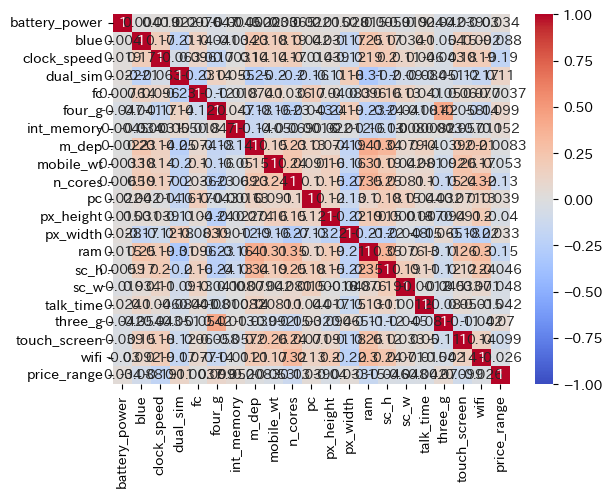

In [38]:
#ヒートマップを可視化のために作成
co = train.corr()
sns.heatmap(co, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

ロジスティック回帰分析を行いたいので前処理

In [48]:
y = train["price_range"] #目的変数
x = train.drop(["price_range"], axis=1)

In [49]:
y.head()

id
0    2
3    3
4    1
5    2
7    0
Name: price_range, dtype: int64

In [50]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
0,1203,0,0.680981,1,1,1,23,0.402580,117,3,2,1331,721,1970,15,1,4,1,0,1
3,1203,1,2.602754,1,0,0,8,0.415612,194,1,19,1571,1262,1150,14,16,14,1,0,1
4,1980,1,2.604065,1,0,0,6,0.858110,122,2,15,364,721,1970,18,12,11,1,0,1
5,1185,1,2.669403,1,3,0,33,0.027065,132,8,4,447,1162,1950,15,3,19,1,0,0
7,1203,1,2.375453,0,4,1,12,0.141485,135,6,5,364,1917,1970,16,7,6,1,1,1


In [64]:
model = svm.LinearSVC()
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [70]:
pred = model.predict(test)

In [66]:
#出力部
sample_submit[1] = pred
sample_submit.to_csv("submit.csv", header = None)

In [67]:
print(pred[:])

[3 3 3 2 3 3 3 2 3 2 2 2 2 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 2 3 2 3
 2 3 3 3 2 3 2 2 2 3 3 2 2 3 2 2 3 3 2 2 3 3 2 2 2 2 3 2 2 2 2 2 3 3 3 2 2
 2 3 3 3 2 3 3 3 3 2 2 3 3 3 3 2 3 3 3 2 3 2 3 3 2 2 3 3 3 3 2 3 3 3 2 3 2
 3 2 3 3 2 3 3 3 3 3 3 3 2 3 3 2 2 2 2 3 3 3 2 3 2 3 2 3 3 2 3 3 3 2 2 3 3
 2 2 2 3 2 2 2 3 2 2 3 3 2 3 3 3 2 3 3 3 3 3 2 3 2 3 2 2 3 2 2 2 2 2 2 3 2
 2 3 3 2 2 3 3 2 3 2 2 2 2 2 3 3 2 3 2 2 3 2 3 3 3 3 3 3 3 3 2 2 2 3 3 3 3
 3 2 2 3 3 2 3 3 3 3 2 3 2 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 2 2 3 2 3 3 3 3
 2 3 2 2 3 3 3 2 2 3 2 3 3 3 3 3 3 3 2 2 3 3 2 3 3 2 3 2 2 3 3 3 2 3 3 3 2
 2 2 2 3 3 2 3 3 2 2 3 3 3 3 2 3 3 2 3 3 2 2 3 2 2 2 2 2 3 2 3 3 3 2 3 3 3
 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 2 3 3 3 3 2 3 3 3 3 2 2 3 3
 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 2 2 2 3 2 2 3 2 2 3 3 3 2 3 2 3 3 3 3 2 3 3
 2 3 2 3 3 3 3 2 3 3 2 3 3 3 2 2 3 3 3 3 3 3 2 3 3 2 3 2 3 2 2 3 3 3 3 3 2
 3 3 3 2 3 2 3 2 2 2 3 3 3 3 2 3 2 3 3 2 3 2 2 2 3 3 3 2 3 2 3 3 3 2 3 3 3
 3 2 2 2 3 3 3 3 3 2 3 3 

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 1998
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  800 non-null    int64  
 1   blue           800 non-null    int64  
 2   clock_speed    800 non-null    float64
 3   dual_sim       800 non-null    int64  
 4   fc             800 non-null    int64  
 5   four_g         800 non-null    int64  
 6   int_memory     800 non-null    int64  
 7   m_dep          800 non-null    float64
 8   mobile_wt      800 non-null    int64  
 9   n_cores        800 non-null    int64  
 10  pc             800 non-null    int64  
 11  px_height      800 non-null    int64  
 12  px_width       800 non-null    int64  
 13  ram            800 non-null    int64  
 14  sc_h           800 non-null    int64  
 15  sc_w           800 non-null    int64  
 16  talk_time      800 non-null    int64  
 17  three_g        800 non-null    int64  
 18  touch_scr